In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def convert_labels(x):


    items = x
    for index, item in enumerate(items):
        if (item ==1):
            items[index] = 'Λίγο'
        elif (item ==2):
            items[index] = 'Μέτριο'
        elif (item ==3):
            items[index] = 'Καλή'
        elif (item ==4):
            items[index] = 'Πολύ Καλή'
        elif (item ==5):
            items[index] = 'Άριστη'   
            
            
    return items


In [8]:


def bar2(x,y,k):
    labels2=x
    numbers=y
    title =k
    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    z = np.arange(len(labels2))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(z - width/2, numbers, width)
    ax.set_ylabel('Βαθμολογία')
    ax.set_title('Ανάλυση ενδιαφέροντος αντικειμένου παρουσίασης του/της κ./κα. '+title)
    ax.set_xticks(z)
    ax.set_xticklabels(labels2)
    autolabel(rects1)
    fig.tight_layout()
    
    fig.savefig('Bar chart_'+title+'.png', bbox_inches='tight')
    
    
    
    
def plot_pie(x,y,k):    
    
    labels2=x
    numbers=y
    title=k
    fig1, ax1 = plt.subplots()
    group_names = labels2

    counts = pd.Series(numbers, 
                   index=labels2)

    explode = (0, 0, 0, 0, 0)

    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
    counts.plot(kind='pie', fontsize=10, colors=colors, explode=explode,autopct='%1.1f%%', shadow=True, startangle=140,figsize=(11, 6))
    plt.axis('equal')
    plt.ylabel('')
    
    plt.legend(labels=counts.index, loc="best")
    plt.title("Οι διαλέξεις που παρουσίασε κάλυψαν τα αντικείμενα που διαπραγματεύονταν;" +title +"\n")
    plt.show()
    val = str(x)
    
    fig1.savefig('Pie chart_'+title+'.png', bbox_inches='tight')
    #https://stackoverflow.com/questions/35488666/matplotlib-pandas-pie-chart-label-mistakes

In [9]:
filenames = glob('*.csv')
dataframes = [pd.read_csv(f, encoding='utf-8') for f in filenames]


 

In [10]:
for x in range(len(dataframes)):
    dataframes[x] = dataframes[x].drop(['Response','Submitted on:','Institution','Department','Course','Group','ID','Full name','Username'], axis=1)

    

In [11]:
   
columns = ['Καθόλου  ενδιαφέρον','Λίγο ενδιαφέρον','Ενδιαφέρον','Πολύ ενδιαφέρον','Εξαιρετικά ενδιαφέρον']
df_sums = pd.DataFrame( columns=columns)
df_sums = df_sums.fillna(0) # with 0s rather than NaNs

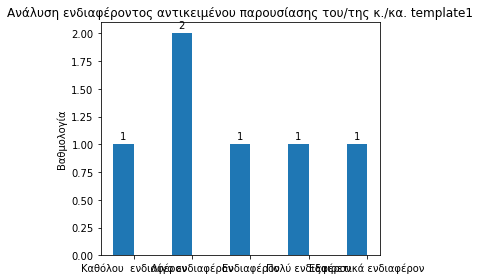

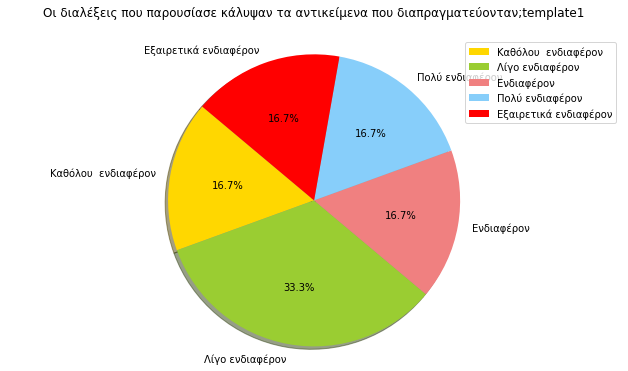

In [12]:






for x in range(len(dataframes)):
    if (len(dataframes[x].columns) == 5):
        sum_column = dataframes[x].sum(axis=0)
        list_sums = []

        for x in range(len(sum_column)):
            list_sums.append(sum_column[x])
        df_sums.loc[len(df_sums)] = list_sums
        df_list = df_sums.values.tolist() 

   


for x in range(len(df_list)):
    
    bar2(columns,df_list[x],filenames[x][:-4])
    plot_pie(columns,df_list[x],filenames[x][:-4])